<a href="https://colab.research.google.com/github/renzotaco/IOIII/blob/main/FlujoMaximoCostoMinimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ortools

     |████████████████████████████████| 14.4 MB 101 kB/s 


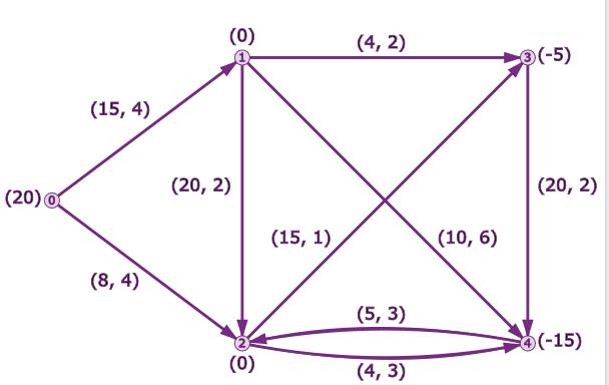

In [3]:

from ortools.graph import pywrapgraph
#between each pair. For instance, the arc from node 0 to node 1 has acapacity of 15 and a unit cost of 4.
start_nodes = [ 0, 0,  1, 1,  1,  2, 2,  3, 4]
end_nodes   = [ 1, 2,  2, 3,  4,  3, 4,  4, 2]
capacities  = [15, 8, 20, 4, 10, 15, 4, 20, 5]
unit_costs  = [ 4, 4,  2, 2,  6,  1, 3,  2, 3]
# Define an array of supplies at each node.
supplies = [20, 0, 0, -5, -15]
# Instantiate a SimpleMinCostFlow solver.
min_cost_flow = pywrapgraph.SimpleMinCostFlow()
# Add each arc.
for i in range(0, len(start_nodes)):
    min_cost_flow.AddArcWithCapacityAndUnitCost(start_nodes[i], end_nodes[i],
                                                capacities[i], unit_costs[i])
# Add node supplies.
for i in range(0, len(supplies)):
    min_cost_flow.SetNodeSupply(i, supplies[i])
 # Find the minimum cost flow between node 0 and node 4.
if min_cost_flow.Solve() == min_cost_flow.OPTIMAL:
    print('Minimum cost:', min_cost_flow.OptimalCost())
    print('')
    print('  Arc    Flow / Capacity  Cost')
    for i in range(min_cost_flow.NumArcs()):
      cost = min_cost_flow.Flow(i) * min_cost_flow.UnitCost(i)
      print('%1s -> %1s   %3s  / %3s       %3s' % (
          min_cost_flow.Tail(i),
          min_cost_flow.Head(i),
          min_cost_flow.Flow(i),
          min_cost_flow.Capacity(i),
          cost))
else:
    print('There was an issue with the min cost flow input.')
    

Minimum cost: 150

  Arc    Flow / Capacity  Cost
0 -> 1    12  /  15        48
0 -> 2     8  /   8        32
1 -> 2     8  /  20        16
1 -> 3     4  /   4         8
1 -> 4     0  /  10         0
2 -> 3    12  /  15        12
2 -> 4     4  /   4        12
3 -> 4    11  /  20        22
4 -> 2     0  /   5         0
